# MiCRM Parameters Exploration and Model Simulations

## Installing, loading and activating environment!!!

In [130]:
using Pkg
using MiCRM
using DifferentialEquations
using Distributions
using Plots
using CairoMakie
using Colors

In [6]:
#Pkg.instantiate()

In [2]:
pwd()

"/Users/vitorferreira/Desktop/Imperial College/ResearchProject/Tutorials/MiCRM"

In [3]:
Pkg.activate(".")

  Activating project at `~/Desktop/Imperial College/ResearchProject/Tutorials/MiCRM`


### First, I define initial parameters for the community

In [4]:
N = 10 # Consumers
M = 10 # Resources
leakage = 0.2

0.2

### I also define the consumers loss term (m) as the maintenance cost to process the resources consumed

In [5]:
maintain(N,M,kw) = repeat([0.2], N)

maintain (generic function with 1 method)

In [6]:
# Generate modular uptake
# modul_uptk(N,M,kw) = MiCRM.Parameters.modular_uptake(N,M, 
#                                                        N_modules = N,
#                                                        s_ratio = 2.0)

In [7]:
# Generate the extra parameters from the package function
params = MiCRM.Parameters.generate_params(N,M, f_m = maintain, λ = leakage)

(N = 10, M = 10, u = [0.10884989213635472 0.03909288422649513 … 0.02273777142610431 0.07388038505088095; 0.023347144872972438 0.005167734936383669 … 0.032939966834641926 0.1651236553410488; … ; 0.10472698007555666 0.11300034418276343 … 0.16862131011136464 0.10363091949582158; 0.039133729365873296 0.01850954529691122 … 0.017570074073672413 0.04337032935861985], m = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2], ρ = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], ω = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], l = [0.011293248139834103 0.01599048008211619 … 0.017090258219400068 0.0023920243084316747; 0.04028580366155634 0.0011167796375643085 … 0.05005727107987293 0.005473491310711557; … ; 0.042620911464140744 0.010008314558369005 … 0.00977007176612547 0.051897518220604046; 0.03241567145114302 0.05437795122436101 … 0.0020326091563712774 0.020501087504080792], kw = (λ = 0.2,))

### Setting initial conditions for the problem

In [8]:
x0 = ones(N+M)
tspan = (0.0, 100.0)

prob = ODEProblem(MiCRM.Simulations.dx!, x0, tspan, params)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: 20-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [9]:
sol = solve(prob, AutoTsit5(Rosenbrock23()))

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 41-element Vector{Float64}:
   0.0
   0.09940772374685224
   0.2636792431734193
   0.4494472300685627
   0.678296288294193
   0.9354720679697953
   1.2323429440902323
   1.5676353635245084
   1.9528243445743827
   2.3946638922439503
   2.90531915880019
   3.4903537327569074
   4.146432278150337
   ⋮
  17.590815481060325
  19.709371676650886
  22.62711039859949
  25.80029467936699
  30.055157492213848
  34.96301446900116
  41.51033475575534
  49.50399375926027
  59.95850789794252
  72.37148693200487
  87.50409566865507
 100.0
u: 41-element Vector{Vector{Float64}}:
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 [1.057424575641356, 1.058361607684793, 1.0579357723256113, 1.0571866344121776, 1.0578607495077368, 1.0575756370392912, 1.0584605702193621, 1.057423052395286, 1.0581301267494974, 1.057211646

In [45]:
# Final state of community
sol[end]

20-element Vector{Float64}:
 1.4589379735695862
 5.991086281900139
 4.4220728564416865
 1.1876048880837042
 4.010137712908566
 1.8071187968486173
 6.132628276062344
 2.171685561507598
 9.180554513285191
 0.7186524749789641
 0.29658741021193274
 0.24677387793514155
 0.20142102191343358
 0.24033996759939413
 0.2408494477266952
 0.24871762551415638
 0.32645879576050507
 0.19474567612364196
 0.27958565044160527
 0.30703891113491344

#### **Plotting the solution**

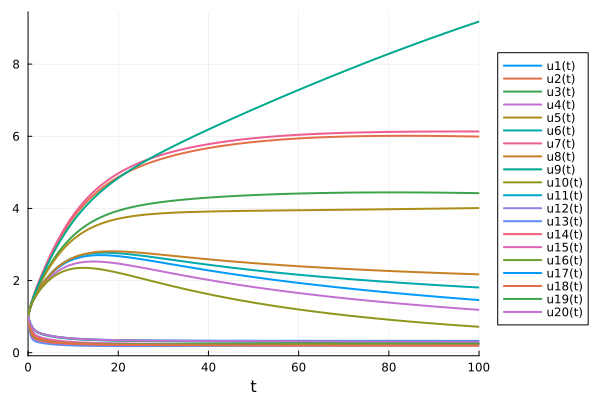

In [10]:
Plots.plot(sol, linewidth = 2, legend = :outerright)

## **Simulations**

In [11]:
# Define varying counts for specific parameters
N_leak = 10
N_mod = 3
N_special = 3
N_rep = 5

# Define ranges of parameters
leak_vect = range(0.0, 0.5, length = N_leak)
modular_vect = range(1.0, 3.0, length = N_mod)
specialist_vect = range(1.0, 5.0, length = N_special)

1.0:2.0:5.0

In [12]:
# Creating array to store results
results = Array{Any, 4}(undef, N_leak, N_mod, N_special, N_rep)

# Generating simulations
for i = 1:N_leak
    for j = 1:N_mod
        for k = 1:N_special
            for r = 1:N_rep
                
                # Generate parameters
                params = MiCRM.Parameters.generate_params(N,M, f_m = maintain, λ = leak_vect[i])
                
                #...Need to define the modular uptake
                
                # Start simulation
                x0 = ones(N+M)
                tspan = (0.0, 500.0)

                prob = ODEProblem(MiCRM.Simulations.dx!, x0, tspan, params)

                results[i, j, k, r] = solve(prob, AutoTsit5(Rosenbrock23()))
                
            end
        end
    end
end

In [13]:
size(results)

(10, 3, 3, 5)

In [14]:
results[1,1,1,1].prob.p.kw

(λ = 0.0,)

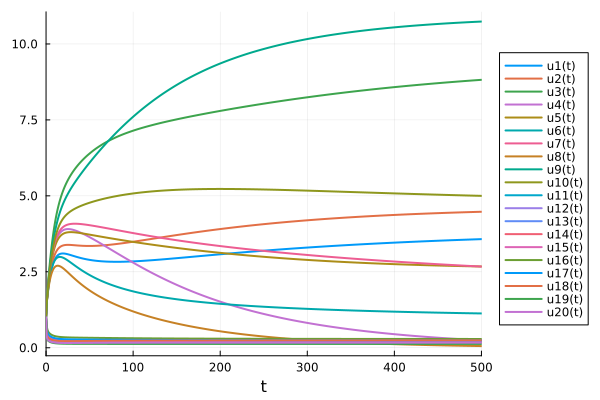

In [15]:
Plots.plot(results[1], linewidth = 2, legend = :outerright)

In [16]:
results[5].prob.p.u

10×10 Matrix{Float64}:
 0.034407   0.139482   0.269707    …  0.199204    0.0296187  0.0104508
 0.0771548  0.0606881  0.0217076      0.127971    0.0185852  0.0135911
 0.0445968  0.0291093  0.0351253      0.153578    0.0363497  0.159373
 0.095945   0.168403   0.173442       0.0325937   0.124086   0.0440913
 0.0649361  0.163745   0.106212       0.155201    0.0626782  0.226924
 0.102145   0.0132286  0.00213393  …  0.0108009   0.511232   0.0312268
 0.0717446  0.0531235  0.278919       0.239112    0.0241746  0.0778823
 0.0511227  0.187052   0.00519792     0.116179    0.160382   0.00482918
 0.166646   0.0112498  0.138919       0.294443    0.0745392  0.0348889
 0.10644    0.0259937  0.115968       0.00341516  0.0382239  0.184146

In [17]:
results[5][:,:]

20×48 Matrix{Float64}:
 1.0  1.0581    1.15297   1.2491    …   0.341304   0.241283   0.169201
 1.0  1.05861   1.15681   1.26009       6.16504    6.39839    6.61337
 1.0  1.05794   1.1518    1.24586       0.424858   0.329178   0.254948
 1.0  1.05848   1.15585   1.25724      11.4083    11.64      11.8285
 1.0  1.05837   1.15499   1.25481       5.77989    6.02073    6.23694
 1.0  1.05842   1.15536   1.25583   …   2.36098    2.34445    2.33975
 1.0  1.05808   1.15287   1.24882       1.37573    1.24235    1.11691
 1.0  1.05832   1.15463   1.25387       2.11028    1.87034    1.64664
 1.0  1.058     1.15225   1.24712       2.51936    2.61874    2.70542
 1.0  1.05871   1.15756   1.26208       4.36389    4.15285    3.95397
 1.0  0.946573  0.862377  0.782011  …   0.299346   0.298093   0.29708
 1.0  0.94206   0.850848  0.764188      0.250327   0.249354   0.248594
 1.0  0.91228   0.783587  0.6727        0.24163    0.242055   0.242493
 1.0  0.962419  0.901556  0.841013      0.343139   0.342069   0.

In [18]:
results[4,1,1,1].prob.p.kw

(λ = 0.16666666666666666,)

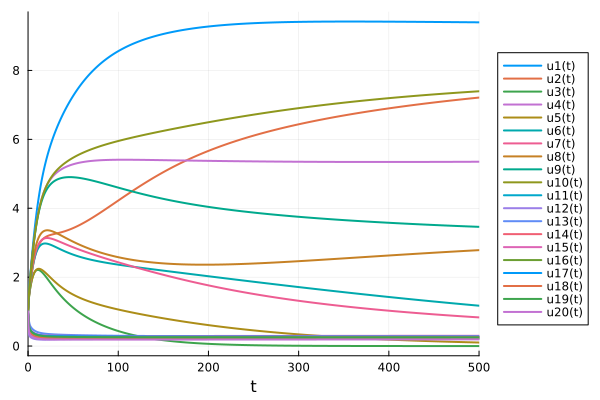

In [19]:
Plots.plot(results[4,1,1,1], linewidth = 2, legend = :outerright)

In [20]:
results[6,1,1,1].prob.p.kw

(λ = 0.2777777777777778,)

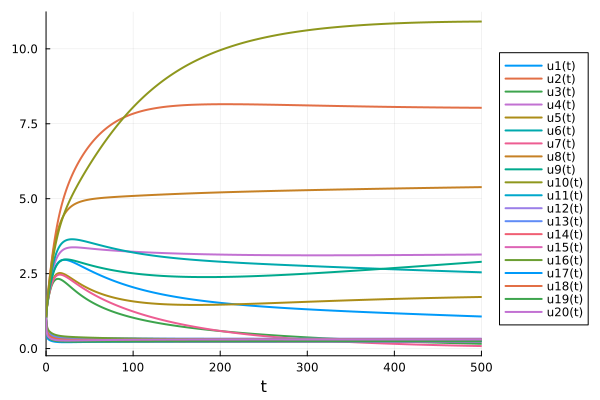

In [21]:
Plots.plot(results[6], linewidth = 2, legend = :outerright)

In [22]:
results[9,1,1,1].prob.p.kw

(λ = 0.4444444444444444,)

In [23]:
results[9].prob.p.u

10×10 Matrix{Float64}:
 0.30192     0.0220219   0.00489979  …  0.0305852  0.00429376  0.0252248
 0.118301    0.00269386  0.00552675     0.0523876  0.00783043  0.0830781
 0.00790748  0.0495383   0.0659001      0.118383   0.0933876   0.239348
 0.00232956  0.134625    0.122565       0.0946969  0.00353872  0.290055
 0.0424937   0.0466773   0.178726       0.101287   0.0562564   0.070304
 0.0873835   0.0811172   0.123389    …  0.0512756  0.0509274   0.196596
 0.233111    0.268115    0.00378714     0.0540659  0.0931119   0.0674257
 0.206133    0.00649206  0.124007       0.0412414  0.268799    0.0960092
 0.152234    0.0678462   0.0460215      0.0716574  0.111744    0.056795
 0.119285    0.135315    0.118462       0.0422883  0.0154137   0.169511

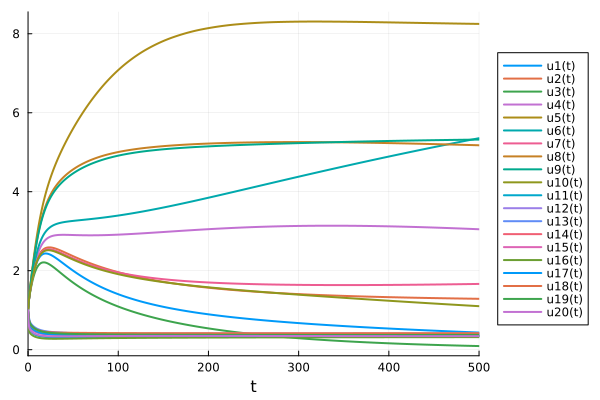

In [24]:
Plots.plot(results[9,1,1,1], linewidth = 2, legend = :outerright)

In [25]:
results[9][:,:]

20×47 Matrix{Float64}:
 1.0  1.03667   1.09264   1.14994   …  0.56176   0.493654  0.433846
 1.0  1.03666   1.09261   1.14993      1.34292   1.31147   1.28834
 1.0  1.03639   1.09091   1.14557      0.183448  0.129961  0.0917134
 1.0  1.03671   1.09292   1.15082      3.13229   3.10115   3.04941
 1.0  1.03711   1.09561   1.15808      8.29614   8.2726    8.24933
 1.0  1.03682   1.09367   1.1528    …  4.78167   5.07267   5.35557
 1.0  1.03665   1.09254   1.14972      1.63707   1.64697   1.66511
 1.0  1.03703   1.09509   1.15666      5.24048   5.2126    5.1761
 1.0  1.03706   1.09523   1.15697      5.27467   5.30062   5.32036
 1.0  1.03662   1.09233   1.14921      1.27162   1.18536   1.10151
 1.0  0.91936   0.811367  0.719871  …  0.337132  0.337896  0.338487
 1.0  0.947079  0.870579  0.799167     0.401457  0.400608  0.399816
 1.0  0.979349  0.942776  0.900751     0.365542  0.364612  0.363967
 1.0  0.956499  0.89243   0.83095      0.346083  0.345774  0.345514
 1.0  0.949494  0.875712  0.80602

## Transform to matrices

### Consumers

In [39]:
C = reduce(hcat, results[7,3,2,2].u)'[:, 1:N]

46×10 Matrix{Float64}:
 1.0      1.0      1.0       1.0      …  1.0       1.0      1.0      1.0
 1.04709  1.04688  1.04684   1.04696     1.04688   1.04709  1.0471   1.04714
 1.12314  1.12165  1.12125   1.12216     1.12169   1.1231   1.12319  1.12343
 1.20186  1.19771  1.1963    1.19892     1.198     1.2016   1.20186  1.20242
 1.28749  1.27885  1.27527   1.28089     1.27986   1.28662  1.28716  1.28808
 1.37373  1.359    1.3518    1.3617   …  1.36134   1.37164  1.37264  1.37378
 1.46358  1.44111  1.42847   1.44414     1.44547   1.45947  1.46114  1.46231
 1.55739  1.52568  1.50565   1.52861     1.53268   1.55035  1.55297  1.55391
 1.65867  1.61594  1.58627   1.61836     1.62621   1.64761  1.65156  1.65203
 1.7694   1.71352  1.67163   1.71501     1.72768   1.75304  1.7588   1.75855
 1.89186  1.82012  1.76284   1.8202   …  1.83889   1.86861  1.87679  1.87557
 2.0257   1.93499  1.85861   1.93305     1.95914   1.99365  2.00498  2.0025
 2.16663  2.05399  1.95482   2.04935     2.0842    2.12372

### Resources

In [40]:
R = reduce(hcat, results[7,3,2,2].u)'[:, N+1:N+M]

46×10 Matrix{Float64}:
 1.0       1.0       1.0       1.0       …  1.0       1.0       1.0
 1.01546   0.932654  0.968299  0.916933     0.915758  0.936699  0.910813
 1.0319    0.832341  0.91561   0.798248     0.795846  0.84283   0.784825
 1.038     0.741122  0.860582  0.69604      0.693123  0.75757   0.678153
 1.03321   0.658594  0.802918  0.608776     0.605944  0.679986  0.588981
 1.01908   0.594154  0.750552  0.544409  …  0.542073  0.618512  0.524813
 0.998744  0.545551  0.70497   0.498121     0.496491  0.571081  0.479806
 0.976164  0.510558  0.667902  0.465792     0.464957  0.536027  0.449002
 0.953835  0.484442  0.637967  0.441846     0.441876  0.509326  0.426408
 0.933218  0.463465  0.613324  0.422421     0.423388  0.487721  0.40808
 0.914325  0.444828  0.591693  0.40495   …  0.406931  0.468581  0.391552
 0.896681  0.427287  0.571619  0.388418     0.391477  0.450633  0.375918
 0.879975  0.410818  0.552757  0.372902     0.377064  0.433782  0.361292
 ⋮                                

## Plotting C and R dynamics

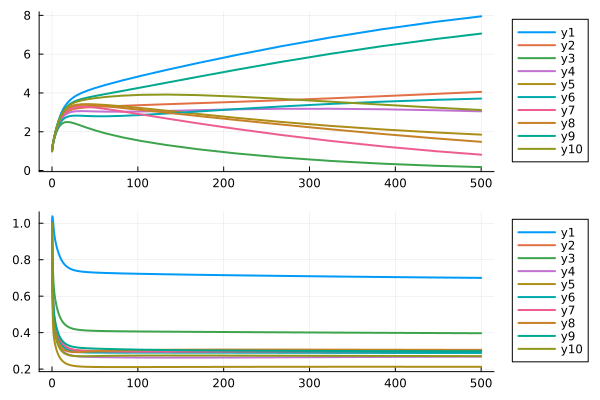

In [41]:
p1 = Plots.plot(results[7,3,2,2].t, C, linewidth = 2, legend = :outerright)
p2 = Plots.plot(results[7,3,2,2].t, R, linewidth = 2, legend = :outerright)

Plots.plot(p1, p2, layout = (2,1))

### Coalescence of 2 communities with different leakage values

In [74]:
# Consumers from "less leaky" community
l1 = copy(results[1,1,1,1].u[end])

consumers_l1 = l1[1:10]

10-element Vector{Float64}:
  3.5751731960416597
  4.47614257004877
  8.819135995219337
  0.24518248273959264
  2.67457700093994
  1.1291405078595003
  2.672204859575736
  0.055586567735267954
 10.737195774505327
  4.999608716635731

In [76]:
# Consumers from the "high leak" community
l2 = copy(results[9,1,1,1].u[end])

consumers_l2 = l2[1:10]

10-element Vector{Float64}:
 0.43384644950121337
 1.2883381129563924
 0.0917133991913065
 3.0494120083529865
 8.24932627481503
 5.355566911768171
 1.665110670832045
 5.17610499716975
 5.320364355907803
 1.1015057992372672

In [81]:
# Combining two community vectors
coal_comm = reduce(vcat, (consumers_l1, consumers_l2))

20-element Vector{Float64}:
  3.5751731960416597
  4.47614257004877
  8.819135995219337
  0.24518248273959264
  2.67457700093994
  1.1291405078595003
  2.672204859575736
  0.055586567735267954
 10.737195774505327
  4.999608716635731
  0.43384644950121337
  1.2883381129563924
  0.0917133991913065
  3.0494120083529865
  8.24932627481503
  5.355566911768171
  1.665110670832045
  5.17610499716975
  5.320364355907803
  1.1015057992372672

In [96]:
# Getting community-specific uptake rates
l1_uptake = copy(results[1,1,1,1].prob.p.u)

l2_uptake = copy(results[9,1,1,1].prob.p.u)

# Combining rates
coal_uptake = reduce(vcat, (l1_uptake, l2_uptake))

20×10 Matrix{Float64}:
 0.012071    0.059995    0.0303391   …  0.213003   0.111312    0.379671
 0.130262    0.348014    0.00223388     0.0108519  0.065479    0.244305
 0.132253    0.00110977  0.0633439      0.052465   0.165717    0.0345933
 0.0423354   0.102738    0.284407       0.0697975  0.295389    0.00094369
 0.27059     0.0843906   0.0385909      0.0431739  0.0376707   0.269027
 0.0257806   0.00221175  0.00125915  …  0.377287   0.259353    0.101836
 0.206596    0.0848461   0.0012096      0.111291   0.161912    0.0751146
 0.00921369  0.330777    0.109105       0.0556181  0.177358    0.218326
 0.0040732   0.116967    0.232436       0.0674478  0.312555    0.00621098
 0.195546    0.038139    0.0305401      0.0411211  0.110721    0.222733
 0.30192     0.0220219   0.00489979  …  0.0305852  0.00429376  0.0252248
 0.118301    0.00269386  0.00552675     0.0523876  0.00783043  0.0830781
 0.00790748  0.0495383   0.0659001      0.118383   0.0933876   0.239348
 0.00232956  0.134625    0.122565

In [98]:
coaslesc_uptake(N,M,kw) = copy(coal_uptake)

coaslesc_uptake (generic function with 1 method)

In [141]:
# Defining maintenance to new community and remaining parameters
maintain(N,M,kw) = repeat([0.2], length(coal_comm))

inflow_rate(N,M,kw) = repeat([1.0], length(coal_comm))

outflow_rate(N,M,kw) = repeat([1.0], length(coal_comm))

outflow_rate (generic function with 1 method)

In [162]:
# Generating parameters
params = MiCRM.Parameters.generate_params(length(coal_comm), M, f_m = maintain, λ = leakage)

(N = 20, M = 10, u = [0.04718424724114804 0.0358399730781235 … 0.14263199213724786 0.04699883786335306; 0.16412907585496345 0.1590535106454883 … 0.04372471870985415 0.13656365866863257; … ; 0.11869248292553422 0.060211624992938355 … 0.028667885741172034 0.182901091281255; 0.16775309937889302 0.051263250926703106 … 0.06201955684200959 0.06477693269734451], m = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2], ρ = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], ω = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], l = [0.007870597896166417 0.003730929895161548 … 0.01026741200133494 0.04091696358189095; 0.0021509983989846577 0.007783844456480782 … 0.01657880138005901 0.03608161584643633; … ; 0.0023341142625372103 0.004926759285718384 … 0.004574577521765394 0.019009569615868086; 0.05520270072801049 0.02886219133970739 … 0.027898520309829856 0.017689990730093384], kw = (λ = 0.2,))

In [157]:
x0 = coal_comm
tspan = (0.0, 500.0)

prob = ODEProblem(MiCRM.Simulations.dx!, x0, tspan, params)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 500.0)
u0: 20-element Vector{Float64}:
  3.5751731960416597
  4.47614257004877
  8.819135995219337
  0.24518248273959264
  2.67457700093994
  1.1291405078595003
  2.672204859575736
  0.055586567735267954
 10.737195774505327
  4.999608716635731
  0.43384644950121337
  1.2883381129563924
  0.0917133991913065
  3.0494120083529865
  8.24932627481503
  5.355566911768171
  1.665110670832045
  5.17610499716975
  5.320364355907803
  1.1015057992372672

In [163]:
params.u

20×10 Matrix{Float64}:
 0.0471842   0.03584    0.174561   …  0.0121841   0.142632    0.0469988
 0.164129    0.159054   0.0137795     0.192085    0.0437247   0.136564
 0.29434     0.0530455  0.103128      0.110177    0.143888    0.000438949
 0.321777    0.135709   0.0922721     0.0366322   0.0275306   0.0233566
 0.0113348   0.315269   0.147567      0.0121519   0.290137    0.0853353
 0.0158515   0.173931   0.0137952  …  0.00574388  0.126724    0.102914
 0.202025    0.0759698  0.0652257     0.00983589  0.00894495  0.170137
 0.0431861   0.140372   0.0162534     0.252144    0.176671    0.00183382
 0.172639    0.0231825  0.0129636     0.0618587   0.0733329   0.283682
 0.00629597  0.259995   0.0108263     0.0273988   0.045444    0.068697
 0.0134699   0.056259   0.053769   …  0.103513    0.351524    0.089858
 0.00676841  0.0648541  0.0584627     0.130491    0.0243248   0.166252
 0.0583967   0.0370597  0.413912      0.203498    0.00440959  0.0118818
 0.0175102   0.0017085  0.0724057     0.21970

In [164]:
sol = solve(prob, AutoTsit5(Rosenbrock23()))

LoadError: BoundsError: attempt to access 20-element Vector{Float64} at index [21]